# DBSCAN step

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

## Sample image

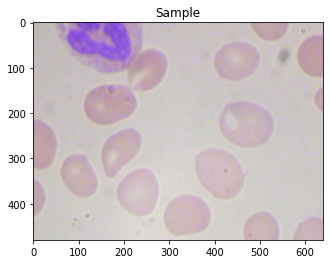

In [2]:
sample = plt.imread("sample.jpeg")
plt.imshow(sample)
plt.title("Sample")
plt.show()

In [3]:
def gray(img):
    assert img.shape[-1] == 3, "Wrong color format"
    return img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114

## To reduce data dimension, we can ignor colors in our project

(480, 640)


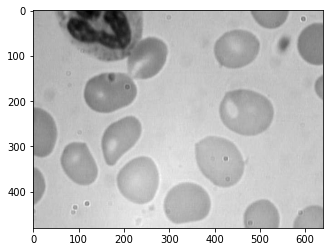

In [4]:
sample = gray(sample)
print(sample.shape)
plt.imshow(sample,cmap=plt.cm.gray)
plt.show()

## It is also a good idea to only pay attention to edges.

In [5]:
def imageGradient(image):
    dx = np.zeros(image.shape)
    dy = np.zeros(image.shape)
    
    for i in range(image.shape[0]):
        dy[i] = ndimage.correlate(image[i],[-1,0,1],mode = 'nearest',output=np.float64)
    
    for j in range(image.shape[1]):
        dx[:,j] = ndimage.correlate(image[:,j],[-1,0,1],mode = 'nearest',output=np.float64)
    
    mag = np.zeros(image.shape)
    mag[:,:] = (dx[:,:]**2 + dy[:,:]**2)**0.5
    ori = np.zeros(image.shape)
    ori[:,:] = np.arctan(dx[:,:]/(dy[:,:]+1e-16))
    return (mag,ori)

In [6]:
edge_mag, edge_ori = imageGradient(sample)

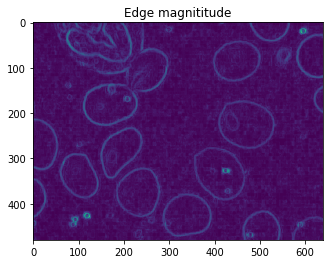

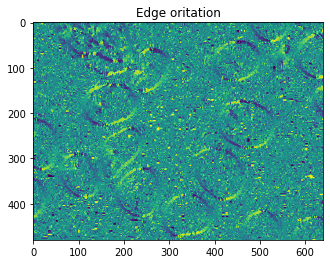

In [7]:
plt.imshow(edge_mag)
plt.title("Edge magnititude")
plt.show()
plt.imshow(edge_ori)
plt.title("Edge oritation")
plt.show()

## Use DBSCAN to find out how many cells are in image

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
#Construct data points
threshold = 0.18 * np.max(edge_mag)
points = np.where(edge_mag > threshold)
X = np.zeros((len(points[0]),2))
X[:,0] = points[0]
X[:,1] = points[1]

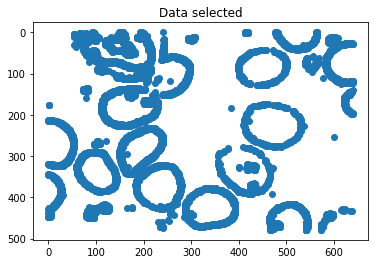

In [10]:
ax = plt.gca() 
ax.invert_yaxis()
ax.scatter(X[:,1],X[:,0])
plt.title("Data selected")
plt.show()

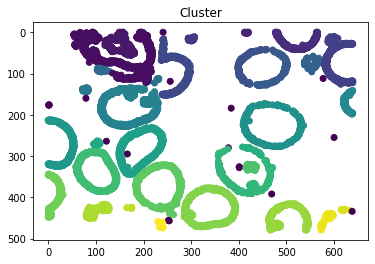

In [11]:
y_pred = DBSCAN(eps = 12, min_samples = 5).fit_predict(X)
ax = plt.gca() 
ax.invert_yaxis()
ax.scatter(X[:,1],X[:,0],c=y_pred)
plt.title("Cluster")
plt.show()

## We can filter small clusters to remove noises

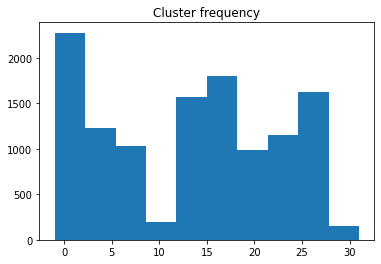

In [12]:
plt.hist(y_pred)
plt.title("Cluster frequency")
plt.show()

In [13]:
total = y_pred[-1] + 1
freq_dict = dict()
for i in range(total):
    freq = np.sum(y_pred == i)
    freq_dict[i] = freq

final = []
mean = np.mean(list(freq_dict.values()))
threshold = 0.48 #threshold to mean
for k,v in freq_dict.items():
    if v < mean * threshold:
        continue
    final.append(k)
print(final)

[0, 1, 3, 5, 6, 7, 13, 14, 15, 16, 17, 20, 21, 23, 24, 25, 26, 27]


## Final Result: how many cells are in image

In [14]:
print(len(final)-1)

17


## Visualize

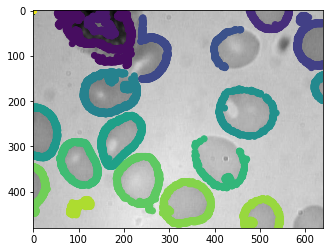

In [15]:
X_visualize = np.zeros(X.shape)
for i in range(len(X)):
    if y_pred[i] in final:
        X_visualize[i] = X[i]
plt.imshow(sample,cmap=plt.cm.gray)
plt.scatter(X_visualize[:,1],X_visualize[:,0],c=y_pred,alpha=1)
plt.show()

Expected was 17, got 17. But there is a coincidence. A cell on corner was not detected but a noise was counted so it happened to be correct this time

## Evaluate Accuracy

In [19]:
#Filename smaple: bloodimage_0_18.jpg, first number is index, second number is expected result
import os
from encapsulated import count
path = "dataset/bloodimage_"
total = 0
detected = 0
for file in os.listdir(path):
    expected = int(file.split('_')[-1].split('.')[0])
    total += expected
    detected += count(file)
accuracy = 1 - abs(total-detected)/total
print(accuracy)

0.8251333333333334
